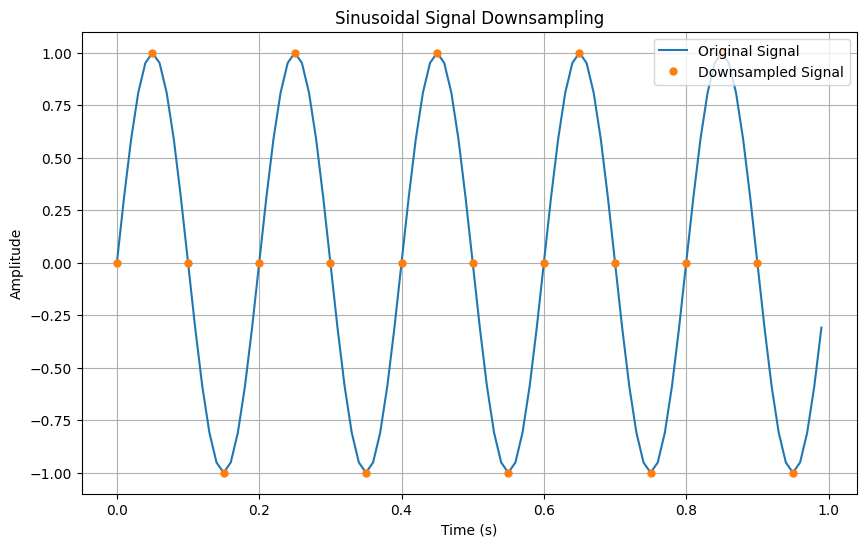

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal, sampling_interval): # signal is a numpy array, sampling_interval is the step size
    # Identify maxima and minima
    maxima_indices = (np.diff(np.sign(np.diff(signal))) < 0).nonzero()[0] + 1
    minima_indices = (np.diff(np.sign(np.diff(signal))) > 0).nonzero()[0] + 1

    # Preserve maxima and minima
    critical_indices = np.union1d(maxima_indices, minima_indices)

    # Downsample the signal
    downsampled_indices = np.arange(0, len(signal), sampling_interval)
    all_indices = np.union1d(critical_indices, downsampled_indices)
    all_indices = np.sort(all_indices)

    return all_indices, signal[all_indices]

# Generate a sinusoidal signal
t = np.arange(0, 1, 0.01)  # 1 second sampled at 0.01 seconds
frequency = 5  # Hz
signal = np.sin(2 * np.pi * frequency * t)

# Downsample while preserving maxima and minima
indices, downsampled_signal = downsample_signal(signal, 5)

# Plot to verify
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label="Original Signal")
plt.plot(t[indices], downsampled_signal, 'o', label="Downsampled Signal", markersize=5)
plt.legend()
plt.title("Sinusoidal Signal Downsampling")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
